# Extract CSV from Image
steps: 
- 

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
root = '/home/user/Dev/Git/roofcounting/'
# image_name = "pasirsari_1_labeled" 
# image_name = "IMG_9_pts"
# image_name = "Image_1_pts"
# image_name = "pts1"
image_name = "pts"
# image_ext = ".png"
image_ext = ".jpg"
image_file = os.path.join("data/images/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
image = cv2.imread(image_path)
# print(image_path)

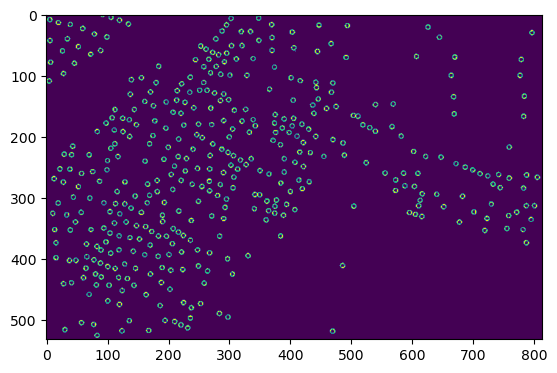

In [24]:
lower_bound = np.array([0,0,10])
upper_bound = np.array([255, 255, 195])
mask_clr = cv2.inRange(image, lower_bound, upper_bound)
plt.imshow(mask_clr)
# plt.imshow(image)

In [12]:
mcp = mask_clr.copy()
contours = cv2.findContours(mcp.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = sorted(contours, key=lambda x:cv2.boundingRect(x)[0])
# contours.sort(key=lambda x:cv2.boundingRect(x)[0])
print(len(contours))

433


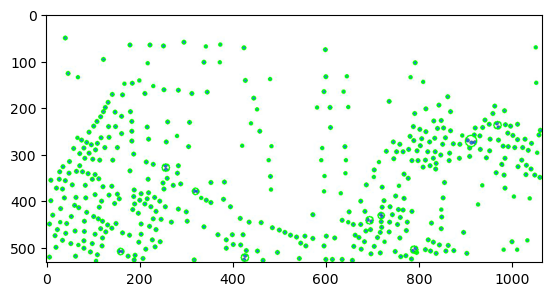

In [13]:
for c in contours:
    (x,y), r = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    r = int(r)
    cv2.circle(image, center, r, (0, 255, 0), 2)

plt.imshow(image)

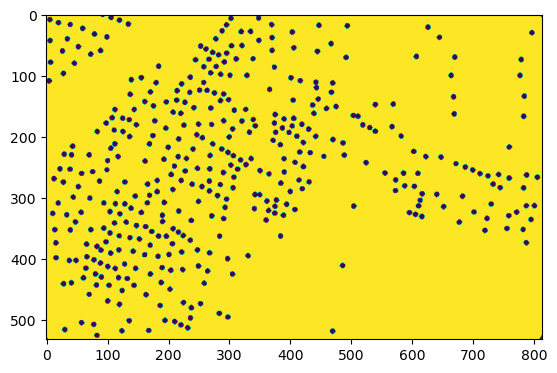

In [32]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_filtered = cv2.inRange(gray, 200, 255)
plt.imshow(gray_filtered)

2


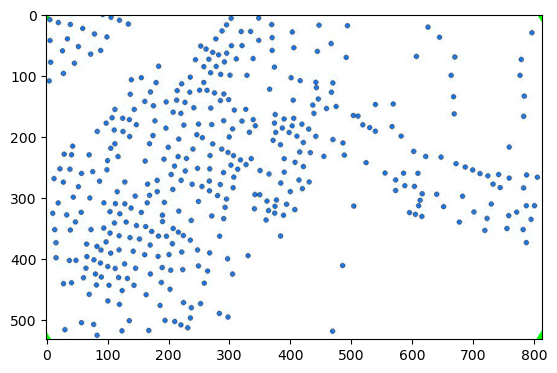

In [35]:
mcp = gray_filtered.copy()
contours = cv2.findContours(mcp.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = sorted(contours, key=lambda x:cv2.boundingRect(x)[0])
print(len(contours))

for c in contours:
    (x,y), r = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    r = int(r)
    cv2.circle(image, center, r, (0, 255, 0), 5)

plt.imshow(image)